In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.providers.aer import Aer
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import qiskit

In [2]:
# Circuit to show the initialization state [101]
qc_init_state = QuantumCircuit(3)
qc_init_state.x(0)
qc_init_state.x(2)
qc_init_state.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

In [3]:
# QFT for 3 qubits on the number 3 [101]
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)

qc.h(0)
qc.cp(np.pi/2, 0, 1)
qc.cp(np.pi/4, 0, 2)

qc.h(1)
qc.cp(np.pi/2, 1, 2)

qc.h(2)
qc.draw()

┌───┐┌───┐                                     
q_0: ┤ X ├┤ H ├─■────────■──────────────────────────
     └───┘└───┘ │P(π/2)  │       ┌───┐              
q_1: ───────────■────────┼───────┤ H ├─■────────────
     ┌───┐               │P(π/4) └───┘ │P(π/2) ┌───┐
q_2: ┤ X ├───────────────■─────────────■───────┤ H ├
     └───┘                                     └───┘

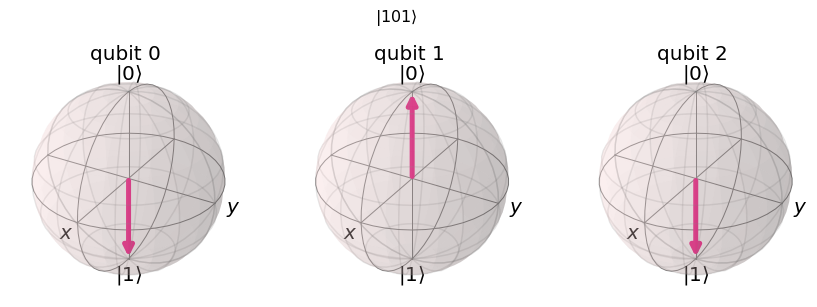

In [4]:
sim = Aer.get_backend("aer_simulator")

# Show the init state on the blochsphere
qc_init = qc_init_state.copy()
qc_init.save_statevector()
statevector_init = sim.run(qc_init).result().get_statevector()

plot_bloch_multivector(statevector_init, "$|101\\rangle$")

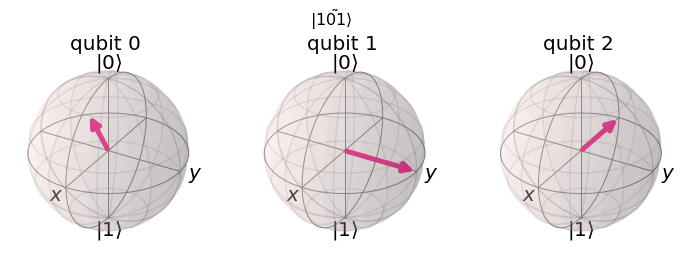

In [5]:
# Show the states after applying QFT
qc_qft = qc.copy()
qc_qft.save_statevector()
statevector_qft = sim.run(qc_qft).result().get_statevector()
plot_bloch_multivector(statevector_qft, "$|\\tilde{101}\\rangle$")

In [ ]:
from qiskit import IBMQ 
#Get the API token in https://quantum-computing.ibm.com/ 
IBMQ.save_account("token")

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')

optimized_circuit = qiskit.transpile(qc, backend)
optimized_circuit.draw()

# run in real hardware
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result() 
print(result.get_counts())

configrc.store_credentials:WARNING:2022-05-21 15:40:43,189: Credentials already present. Set overwrite=True to overwrite.
